In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score)
from sklearn.metrics import average_precision_score
import pandas as pd

In [4]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [5]:
########## Sklearn #############
# Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
# Models
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.svm import SVC                             # SVC
from sklearn import tree                                # CART - Sınıflandırma ve Regresyon Ağaçları
from sklearn.tree import DecisionTreeClassifier         # CART - Sınıflandırma ve Regresyon Ağaçları
from sklearn.ensemble import BaggingClassifier          # Bagging
from sklearn.ensemble import VotingClassifier           # Voting
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.ensemble import AdaBoostClassifier         # Ada Boost
from sklearn.ensemble import GradientBoostingClassifier # GBM - Gradient Boosting Machine
from sklearn.ensemble import ExtraTreesClassifier

                   # LightGBM | !conda install -c conda-forge lightgbm

In [6]:
import pandas as pd
import numpy as np
import sys, os , warnings
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler,RobustScaler, PowerTransformer, normalize
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.utils import resample

In [8]:
df = pd.read_csv('./cleanedCICIDS2017.csv' ,index_col=0)

In [9]:
df.shape

(2520798, 16)

In [10]:
df.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std,Label
0,22,1266342,976,0,15075.50000,104051.399700,19636.44809,0,0,0,1,0,0,243,0.0,0
1,22,1319353,976,0,15706.58333,104861.870100,21337.26261,0,0,0,1,0,0,243,0.0,0
2,22,160,0,0,160.00000,0.000000,0.00000,0,0,0,0,1,1,243,0.0,0
3,22,1303488,976,0,15896.19512,106554.899000,23962.23892,0,0,0,1,0,0,243,0.0,0
4,35396,77,0,0,38.50000,14.849242,0.00000,0,0,0,0,1,1,290,0.0,0


In [11]:
Y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Label']),
                                                    Y,
                                                    test_size = 0.3, 
                                                    shuffle = True, 
                                                    stratify = Y, 
                                                    random_state = 0)

In [12]:
#check and visualize outliers for each feature 

In [13]:
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

15

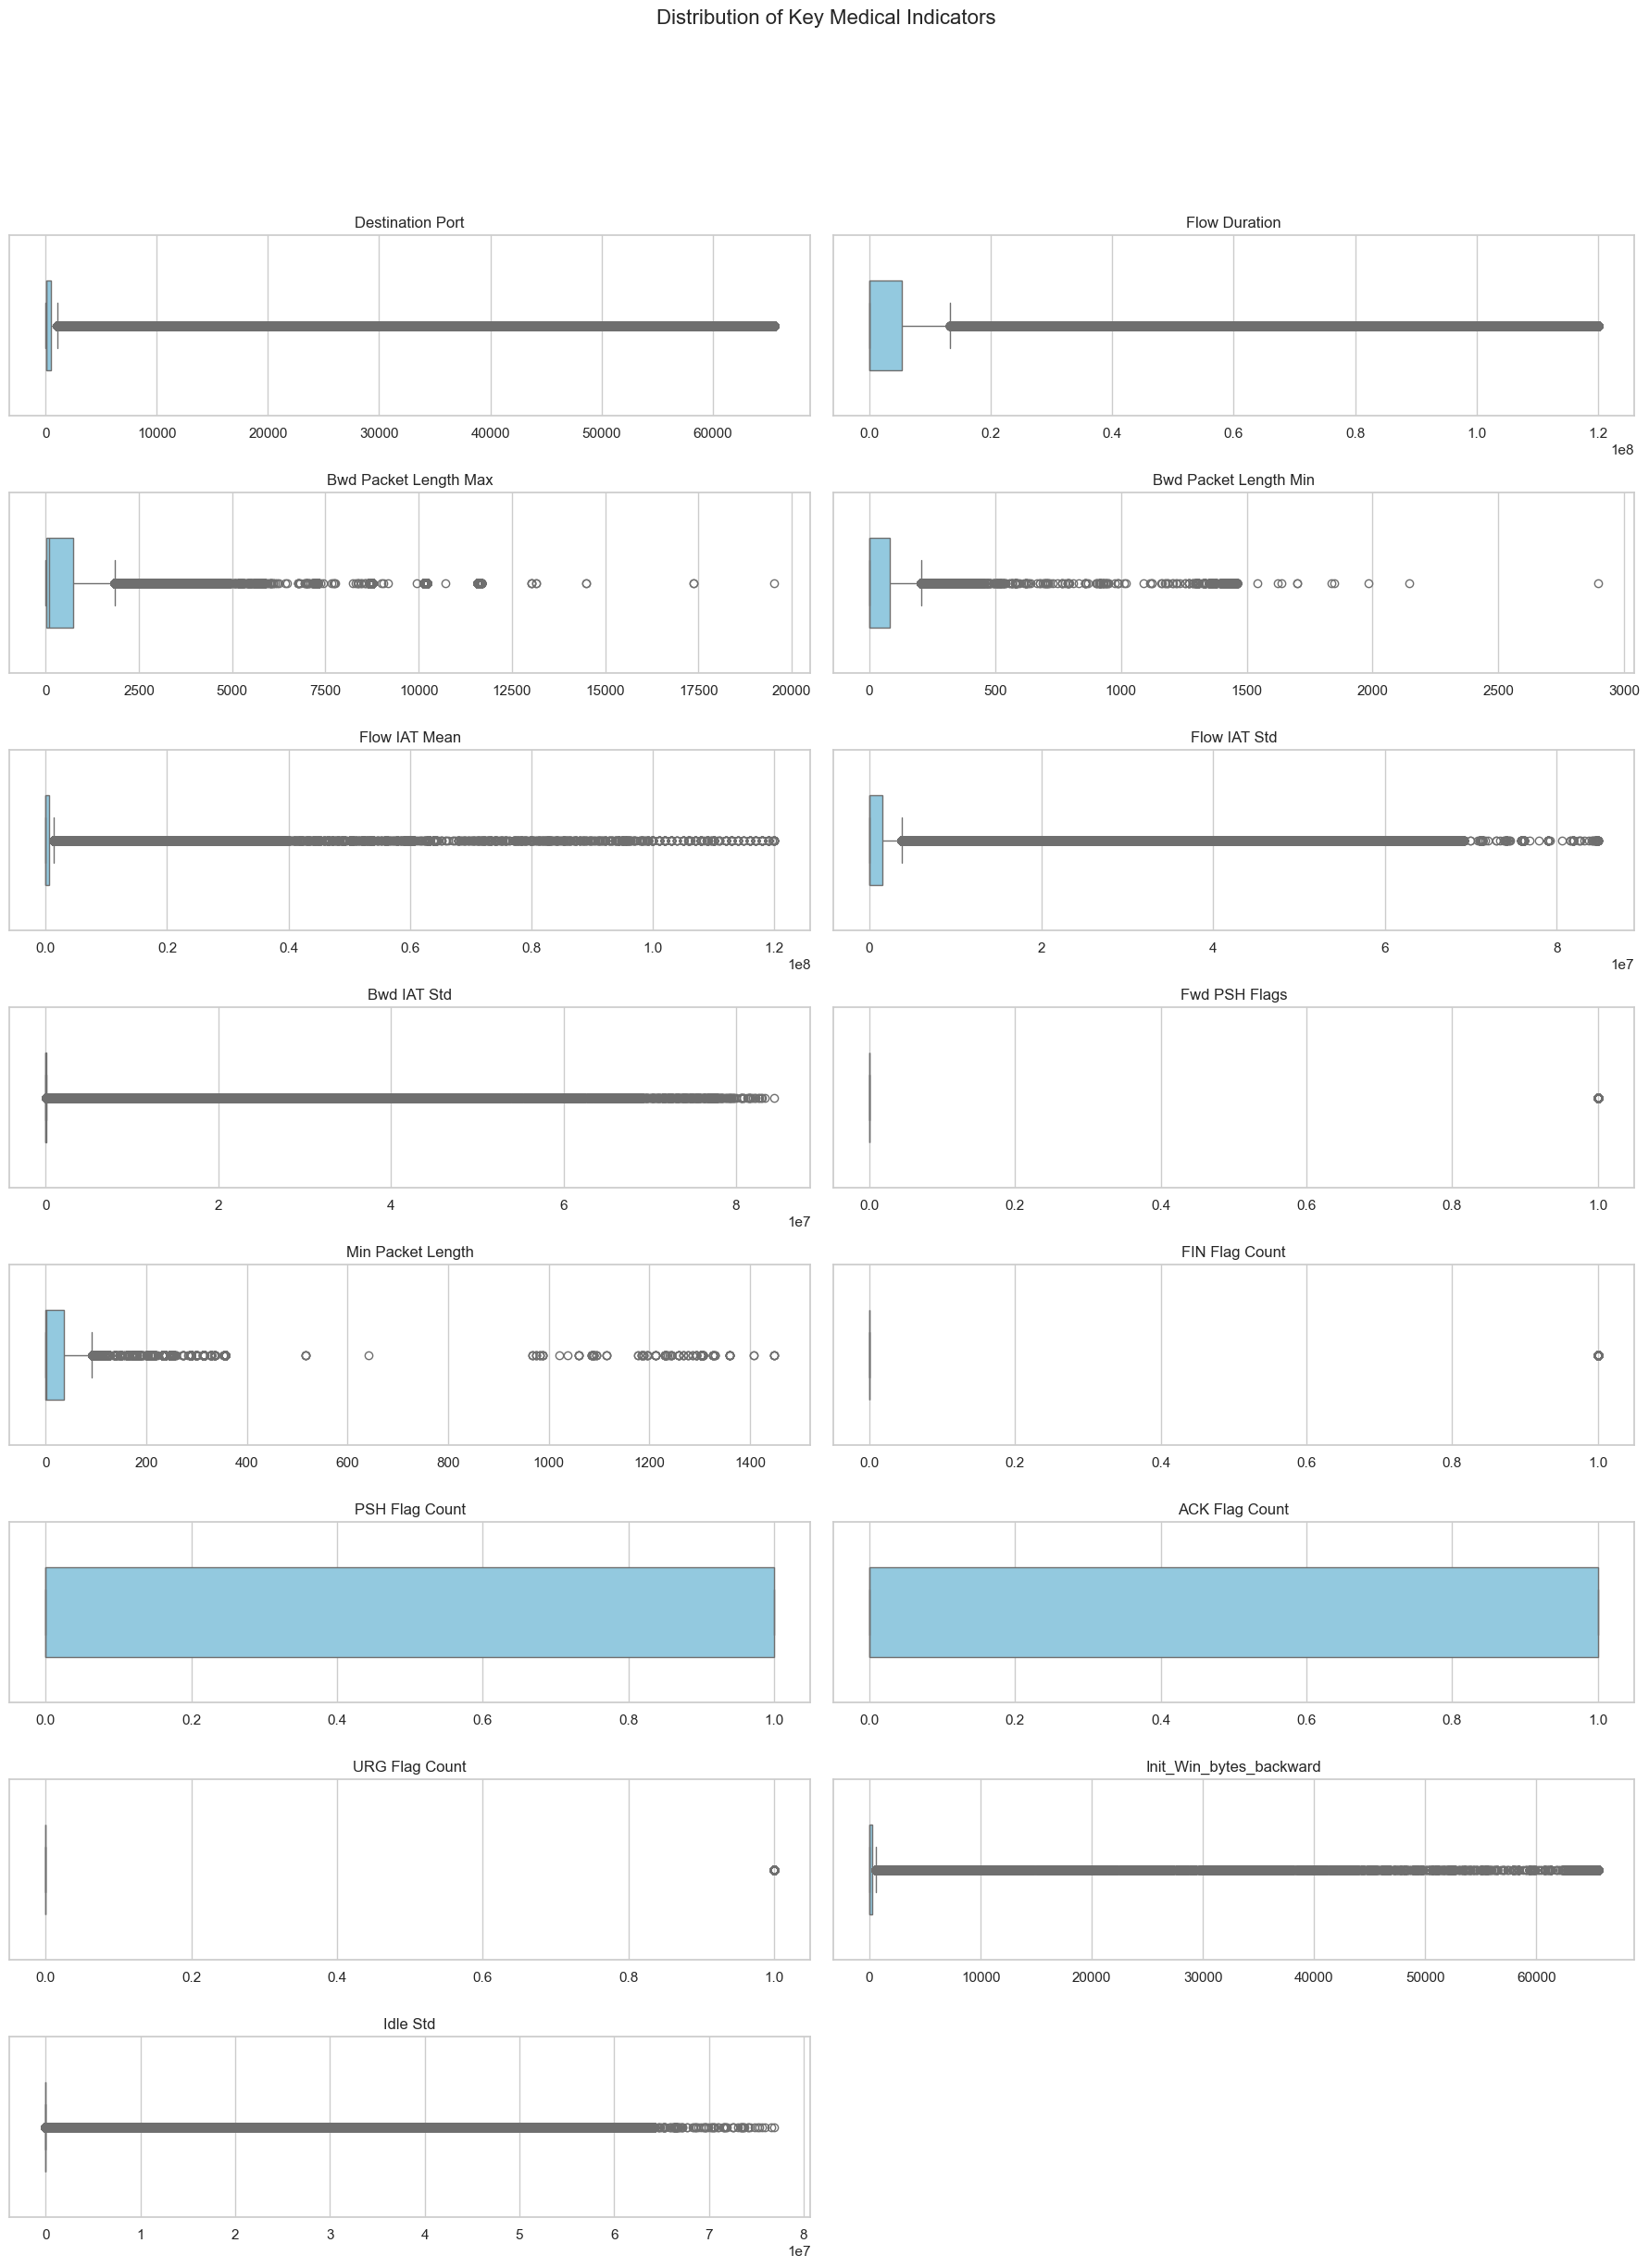

In [11]:
import math

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 2  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=X_train[col], color='skyblue', width=0.5)    
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
#remove outliers

In [14]:
def remove_outliers(X):
    Q1 = X.drop('label',axis=1).quantile(0.1)
    Q3 = X.drop('label',axis=1).quantile(0.99)
    IQR = Q3 - Q1

    mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

    return X[mask]

In [15]:
# Removing outliers for each column
def remove_outliers_iqr(df, lower_limit =0.25, upper_limit= 0.75):
    # Select only numeric columns to apply IQR
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(lower_limit )  # 1st quartile
        Q3 = df[col].quantile(upper_limit)  # 3rd quartile
        IQR = Q3 - Q1                # Interquartile range
        
        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [16]:
df.shape

(2520798, 16)

In [17]:
# Apply the function to remove outliers
df_cleaned = remove_outliers_iqr(df)

# Display the cleaned DataFrame
df_cleaned.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std,Label
17,123,16506,48,48,16506.0,0.00000,0.0,0,48,0,0,0,0,-1,0.0,0
21,123,86068,48,48,86068.0,0.00000,0.0,0,48,0,0,0,0,-1,0.0,0
23,53,30465,61,61,30465.0,0.00000,0.0,0,45,0,0,0,0,-1,0.0,0
24,53,30911,50,50,6182.2,11879.22622,0.0,0,34,0,0,0,0,-1,0.0,0
26,123,86016,48,48,86016.0,0.00000,0.0,0,48,0,0,0,0,-1,0.0,0


In [18]:
df.shape#no records removed!!!

(2520798, 16)

In [19]:
y_train.shape

(1764558,)

In [20]:
y_train.value_counts()

Label
0    1466539
1     298019
Name: count, dtype: int64

In [21]:
X_train.shape

(1764558, 15)

In [22]:
#note ROS done on training data only:
train = pd.concat([X_train, y_train],axis = 1)
train.shape

(1764558, 16)

In [23]:
train['Label'].value_counts()

Label
0    1466539
1     298019
Name: count, dtype: int64

In [26]:
def down_sample(df_, majority_remained ,target_column_name = 'Label',  majority_label = 0, mininority_label = 1):
    # Assume 'target' is your label column, and the rest are feature columns
    # Separate majority and minority classes
    majority_class = df_[df_[target_column_name] == majority_label]  # Replace 0 with your majority class label
    minority_class = df_[df_[target_column_name] == mininority_label]  # Replace 1 with your minority class label
    
    # Down-sample the majority class
    majority_downsampled = resample(majority_class, 
                                    replace=False,    # sample without replacement
                                    n_samples=majority_remained, #len(minority_class),  # match minority class size
                                    random_state=42)  # reproducible results
    
    # Combine minority class with the down-sampled majority class

    df_downsampled = pd.concat([majority_downsampled, minority_class]).sample(frac = 1)
    return df_downsampled


In [27]:
train_downsampled = down_sample(train, 766539 )

In [34]:
train_downsampled.shape

(1064558, 16)

In [28]:
# Display the class distribution after down-sampling
train_downsampled['Label'].value_counts()

Label
0    766539
1    298019
Name: count, dtype: int64

In [29]:
train['Label'].value_counts()

Label
0    1466539
1     298019
Name: count, dtype: int64

In [30]:
train_downsampled.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std,Label
750354,443,260576,1460,0,2.368873e+04,3.938912e+04,46759.881487,0,0,0,1,0,0,60,0.0,0
1138442,57588,3,0,0,3.000000e+00,0.000000e+00,0.000000,0,0,0,0,1,0,-1,0.0,0
2414854,80,100078992,5792,0,7.148499e+06,2.640000e+07,58791.072560,0,0,0,0,1,0,235,0.0,1
2695223,51947,222,0,0,2.220000e+02,0.000000e+00,0.000000,0,0,0,0,1,1,65535,0.0,0
1733984,21,234,0,0,1.170000e+02,4.384062e+01,0.000000,1,0,0,0,1,0,0,0.0,1


In [37]:
#from DGM preprocessing code implementation
def preprocess(x_train, x_test, data_cols, preprocessor = "StandardScaler",reject_features=False):
    """
    Scale and transform data with an option to remove highly correlated features
    """
    if reject_features :
        to_drop =  dropped_featues
        x_train.drop(to_drop,axis=1,inplace=True)
        x_test.drop(to_drop,axis=1,inplace=True)
        data_cols = list(x_train.columns)[:-2]

    if preprocessor == "MinMax":
        scaler = MinMaxScaler(feature_range=(0, 1))
        x_train_transformed = scaler.fit_transform(x_train[data_cols])
        x_test_transformed = scaler.transform(x_test[data_cols])
        return x_train_transformed, x_test_transformed

    if preprocessor == "Robust":
        scaler = RobustScaler(quantile_range=(0.1, 99))
        x_train_transformed = scaler.fit_transform(x_train[data_cols])
        x_test_transformed  = scaler.transform(x_test[data_cols])
        return x_train_transformed , x_test_transformed

    if preprocessor == "power_transform":
        pt = PowerTransformer(method="yeo-johnson")
        x_train_transformed = pt.fit_transform(x_train[data_cols])
        x_test_transformed = pt.transform(x_test[data_cols])
        return x_train_transformed , x_test_transformed

    else :
        scaler = StandardScaler()
        x_train_transformed  = scaler.fit_transform(x_train[data_cols])
        x_test_transformed = scaler.transform(x_test[data_cols])
        return x_train_transformed, x_test_transformed

In [31]:
X_train = train_downsampled.drop(['Label'],axis =1 )
Y_train =  train_downsampled['Label']

In [32]:
data_cols = X_train.columns

In [22]:
X_train.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std
345967,80,32511418,1806,0,2.500878e+06,4.414922e+06,5.323816e+06,0,0,0,1,0,0,939,4086.846013
593126,443,193333,1460,0,1.757573e+04,3.377168e+04,4.350851e+04,0,0,0,1,0,0,60,0.000000
1012721,443,435704,773,0,2.562965e+04,4.491948e+04,6.791098e+04,0,0,0,1,0,0,5186,0.000000
671504,53,289,144,144,9.633333e+01,1.651222e+02,0.000000e+00,0,30,0,0,0,0,-1,0.000000
2452478,53,252129,202,202,2.521290e+05,0.000000e+00,0.000000e+00,0,58,0,0,0,0,-1,0.000000


In [ ]:
#we selected min-max transformation
1064558

In [33]:
X_train.shape , Y_train.shape

((1064558, 15), (1064558,))

In [35]:
X_test.shape , y_test.shape

((756240, 15), (756240,))

In [38]:
x_train, x_test =preprocess(X_train, X_test, data_cols, preprocessor = "MinMax",reject_features=False)

In [39]:
#before transimission:
X_train.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std
750354,443,260576,1460,0,2.368873e+04,3.938912e+04,46759.881487,0,0,0,1,0,0,60,0.0
1138442,57588,3,0,0,3.000000e+00,0.000000e+00,0.000000,0,0,0,0,1,0,-1,0.0
2414854,80,100078992,5792,0,7.148499e+06,2.640000e+07,58791.072560,0,0,0,0,1,0,235,0.0
2695223,51947,222,0,0,2.220000e+02,0.000000e+00,0.000000,0,0,0,0,1,1,65535,0.0
1733984,21,234,0,0,1.170000e+02,4.384062e+01,0.000000,1,0,0,0,1,0,0,0.0


In [40]:
x_train = pd.DataFrame(x_train, columns= data_cols)
x_test = pd.DataFrame(x_test, columns= data_cols)

In [55]:
x_test.shape

(756240, 15)

In [41]:
#after transformation:
x_train.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std
0,0.006760,2.171575e-03,0.074757,0.0,1.975144e-04,4.644943e-04,0.000563,0.0,0.0,0.0,1.0,0.0,0.0,0.000931,0.0
1,0.878750,1.333333e-07,0.000000,0.0,1.333333e-07,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0
2,0.001221,8.339916e-01,0.296569,0.0,5.957093e-02,3.113208e-01,0.000708,0.0,0.0,0.0,0.0,1.0,0.0,0.003601,0.0
3,0.792673,1.958333e-06,0.000000,0.0,1.958333e-06,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0
4,0.000320,2.058333e-06,0.000000,0.0,1.083333e-06,5.169884e-07,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.000015,0.0


In [42]:
#let's save our work:
import pickle
file_path = './'

In [43]:
# Cleaned and processed train data
pickle.dump((x_train, Y_train), open(file_path+'final_trainCICIDS2017.pkl', 'wb'))

In [44]:
pickle.dump((x_test, y_test), open(file_path+'final_testCICIDS2017.pkl', 'wb'))

In [45]:
#check every thing is ok!
#((1064558, 15), (1064558,))
x_train, y_train = pickle.load( open(file_path+'final_trainCICIDS2017.pkl', 'rb'))

In [46]:
x_train.shape

(1064558, 15)

In [47]:
y_train.shape

(1064558,)

In [48]:
x_train.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std
0,0.006760,2.171575e-03,0.074757,0.0,1.975144e-04,4.644943e-04,0.000563,0.0,0.0,0.0,1.0,0.0,0.0,0.000931,0.0
1,0.878750,1.333333e-07,0.000000,0.0,1.333333e-07,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0
2,0.001221,8.339916e-01,0.296569,0.0,5.957093e-02,3.113208e-01,0.000708,0.0,0.0,0.0,0.0,1.0,0.0,0.003601,0.0
3,0.792673,1.958333e-06,0.000000,0.0,1.958333e-06,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0
4,0.000320,2.058333e-06,0.000000,0.0,1.083333e-06,5.169884e-07,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.000015,0.0


In [53]:
#also,we save it as csv file:
pd.concat([x_train.reset_index(drop = True),Y_train.reset_index(drop= True)], axis = 1).to_csv(file_path+'ProcessedTrain_CICIDS2017.csv',index=False)
pd.concat([x_test.reset_index(drop = True),y_test.reset_index(drop = True)], axis = 1).to_csv(file_path+'ProcessedTest_CICIDS2017.csv',index=False)

In [52]:
#check every thing is ok:
tr = pd.read_csv('ProcessedTrain_CICIDS2017.csv')
tr.shape

(1064558, 16)

In [54]:
te = pd.read_csv('ProcessedTest_CICIDS2017.csv')
te.shape

(756240, 16)

In [ ]:
#the end